#  </span> <span style="color:red"> LEZIONE 06  </span>
    
## ESERCIZIO 06.1  

### Simulazione del modello di Ising 1D con punti campionati tramite algoritmo di Metropolis

Grafici della stima delle grendezze $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ e delle rispettive incertezze (calcolate con la tecnica del datablocking), in funzione della temperatura $T$ nel *range* $[0.5, 2.0]$, per un sistema di $N=50$ spins con $J=1$. Il numero di blocchi con cui viene effettuata la stima delle grandezze è $nblk=20$ (viene salvato l'ultimo blocco) e il numero di passi Metropolis è $nstep=10^4$.

Vengono inoltre rappresentate, per confronto, le soluzioni analitiche. 

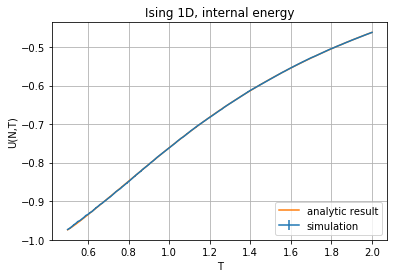

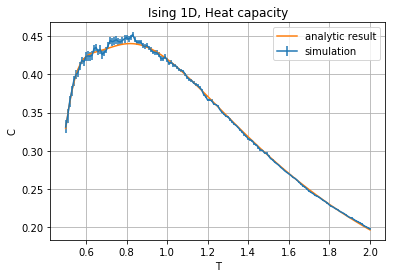

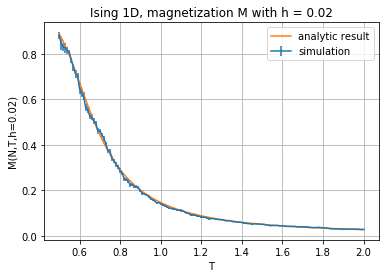

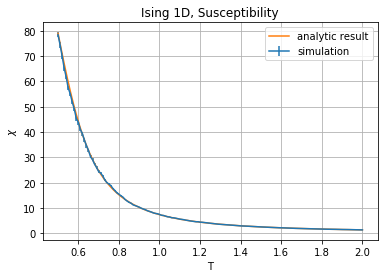

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
b = beta
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
h=0.02 #external field
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)


x, f, error = np.loadtxt("./Exercise_6.1/Output/Internal_energy_m.dat", usecols=(0,1,2), delimiter=';', unpack='true')
plt.errorbar(x,f,yerr=error, label='simulation')
plt.plot(T, e, label='analytic result')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U(N,T)')
plt.legend(loc='lower right')
plt.grid(True)

plt.figure()
x, f, error = np.loadtxt("./Exercise_6.1/Output/Heat_capacity_m.dat", usecols=(0,1,2), delimiter=';', unpack='true')
plt.errorbar(x,f,yerr=error, label='simulation')
plt.plot(T, heat, label='analytic result')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend(loc='upper right')
plt.grid(True)

plt.figure()
x, f, error = np.loadtxt("./Exercise_6.1/Output/Magnetization_m.dat", usecols=(0,1,2), delimiter=';', unpack='true')
plt.errorbar(x,f,yerr=error, label='simulation')
plt.plot(T, M, label='analytic result')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('M(N,T,h=0.02)')
plt.legend(loc='upper right')
plt.grid(True)

plt.figure()
x, f, error = np.loadtxt("./Exercise_6.1/Output/Susceptivity_m.dat", usecols=(0,1,2), delimiter=';', unpack='true')
plt.errorbar(x,f,yerr=error, label='simulation')
plt.plot(T, X, label='analytic result')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

### Simulazione del modello di Ising 1D con punti campionati tramite *Gibbs sampling*

Grafici della stima delle grendezze $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ e delle rispettive incertezze (calcolate con la tecnica del datablocking), in funzione della temperatura $T$ nel *range* $[0.5, 2.0]$, per un sistema di $N=50$ spins con $J=1$. Il numero di blocchi con cui viene effettuata la stima delle grandezze è $nblk=20$ (viene salvato l'ultimo blocco) e il numero di passi Metropolis è $nstep=10^4$.

Vengono inoltre rappresentate, per confronto, le soluzioni analitiche. 

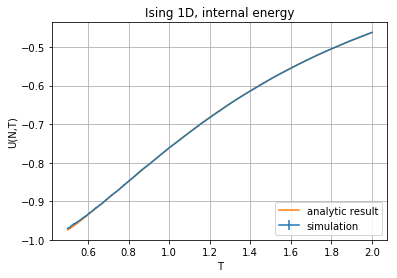

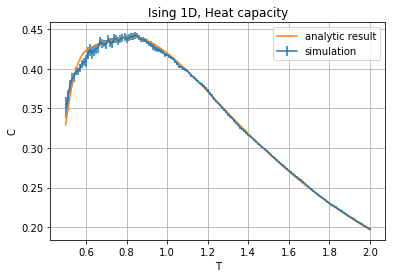

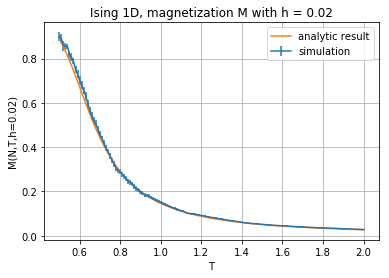

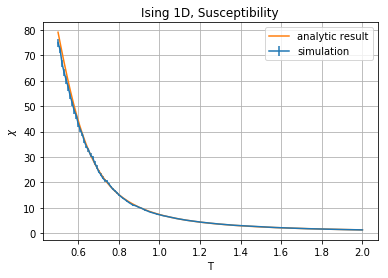

In [2]:
x, f, error = np.loadtxt("./Exercise_6.1/Output/Internal_energy_g.dat", usecols=(0,1,2), delimiter=';', unpack='true')
plt.errorbar(x,f,yerr=error, label='simulation')
plt.plot(T, e, label='analytic result')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U(N,T)')
plt.legend(loc='lower right')
plt.grid(True)

plt.figure()
x, f, error = np.loadtxt("./Exercise_6.1/Output/Heat_capacity_g.dat", usecols=(0,1,2), delimiter=';', unpack='true')
plt.errorbar(x,f,yerr=error, label='simulation')
plt.plot(T, heat, label='analytic result')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend(loc='upper right')
plt.grid(True)

plt.figure()
x, f, error = np.loadtxt("./Exercise_6.1/Output/Magnetization_g.dat", usecols=(0,1,2), delimiter=';', unpack='true')
plt.errorbar(x,f,yerr=error, label='simulation')
plt.plot(T, M, label='analytic result')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('M(N,T,h=0.02)')
plt.legend(loc='upper right')
plt.grid(True)

plt.figure()
x, f, error = np.loadtxt("./Exercise_6.1/Output/Susceptivity_g.dat", usecols=(0,1,2), delimiter=';', unpack='true')
plt.errorbar(x,f,yerr=error, label='simulation')
plt.plot(T, X, label='analytic result')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()